In [32]:
import pandas as pd

# Task 1: Cleaning the dataframe
##### - Drop NA values 
##### - Clean field 'review_text' (strip what need to be stripped)
##### - Create column 'sentiment' (positive or negative review) 


### Read csv and convert to lower case

In [33]:
df = pd.read_csv('./dataset/reviews.csv')

In [34]:
df.head()

,review_text,rating
0,"Estou muito satisfeito, o visor é melhor do qu...",4
1,"""muito boa\n\nO que gostei: preco\n\nO que não...",5
2,"Rápida, ótima qualidade de impressão e fácil d...",5
3,Produto de ótima qualidade em todos os quesito!,5
4,Precisava comprar uma tv compatível com meu dv...,5


In [35]:
print('Before drop NA:')
print(df.count())

# There is 1 missing value at 'review_text'
df.dropna(inplace=True)
print('-'*10)
print('After drop NA:')
print(df.count())

Before drop NA:
review_text    84990
rating         84991
dtype: int64
----------
After drop NA:
review_text    84990
rating         84990
dtype: int64


### Clean field 'review_text'
#### - Functions we need:

In [36]:
import unidecode
import string
import re

def strip_ponctuation(text):
    clean_text = ''.join(' ' if c in string.punctuation else c for c in text)
    ''.join(clean_text.split())
    return clean_text


def strip_linebreak_tab(text):
    return re.sub(r'\n|\t', ' ', text)


def strip_multiple_whitespaces(text):
    return re.sub(r'\s{2,}', ' ', text)


def strip_accents(text):
    return unidecode.unidecode(text)

#### Convert to lower case

In [37]:
df['review_text'] = df['review_text'].apply(lambda review_text : review_text.lower())
df.head()

,review_text,rating
0,"estou muito satisfeito, o visor é melhor do qu...",4
1,"""muito boa\n\no que gostei: preco\n\no que não...",5
2,"rápida, ótima qualidade de impressão e fácil d...",5
3,produto de ótima qualidade em todos os quesito!,5
4,precisava comprar uma tv compatível com meu dv...,5


#### Strip ponctuation

In [38]:
df['review_text'] = df['review_text'].apply(lambda review_text : strip_ponctuation(review_text))
df.head()

,review_text,rating
0,estou muito satisfeito o visor é melhor do qu...,4
1,muito boa\n\no que gostei preco\n\no que não...,5
2,rápida ótima qualidade de impressão e fácil d...,5
3,produto de ótima qualidade em todos os quesito,5
4,precisava comprar uma tv compatível com meu dv...,5


#### Strip line breaks and tabulations

In [39]:
df['review_text'] = df['review_text'].apply(lambda review_text : strip_linebreak_tab(review_text))
df.head()

,review_text,rating
0,estou muito satisfeito o visor é melhor do qu...,4
1,muito boa o que gostei preco o que não gos...,5
2,rápida ótima qualidade de impressão e fácil d...,5
3,produto de ótima qualidade em todos os quesito,5
4,precisava comprar uma tv compatível com meu dv...,5


#### Strip multiple whitespaces

In [40]:
df['review_text'] = df['review_text'].apply(lambda review_text : strip_multiple_whitespaces(review_text))
df.head()

,review_text,rating
0,estou muito satisfeito o visor é melhor do que...,4
1,muito boa o que gostei preco o que não gostei...,5
2,rápida ótima qualidade de impressão e fácil de...,5
3,produto de ótima qualidade em todos os quesito,5
4,precisava comprar uma tv compatível com meu dv...,5


#### Strip accents

In [41]:
df['review_text'] = df['review_text'].apply(lambda review_text : strip_accents(review_text))
df.head()

,review_text,rating
0,estou muito satisfeito o visor e melhor do que...,4
1,muito boa o que gostei preco o que nao gostei...,5
2,rapida otima qualidade de impressao e facil de...,5
3,produto de otima qualidade em todos os quesito,5
4,precisava comprar uma tv compativel com meu dv...,5


### Create column 'sentiment'

In [42]:
def get_sentiment(rating):
    if rating <= 3:
        return 'negativo'
    elif rating > 3:
        return 'positivo'

df['sentiment'] = df.rating.apply(lambda rating : get_sentiment(rating))
df.head()

,review_text,rating,sentiment
0,estou muito satisfeito o visor e melhor do que...,4,positivo
1,muito boa o que gostei preco o que nao gostei...,5,positivo
2,rapida otima qualidade de impressao e facil de...,5,positivo
3,produto de otima qualidade em todos os quesito,5,positivo
4,precisava comprar uma tv compativel com meu dv...,5,positivo


# Task 2: Distribute the dataframe evenly
##### - Same quantity of positive and negative reviews

In [51]:
print(df[df['sentiment'] == 'positivo'].count()[0])
print(df[df['sentiment'] == 'negativo'].count()[0])

66816
18174


In [52]:
evenly_distrubute_quantity = df[df.sentiment == 'negativo'].count()[0]

evenly_distrubute_quantity
df = df.groupby('sentiment', as_index=False, group_keys=False).apply(lambda x: x.sample(n=evenly_distrubute_quantity, random_state=1, replace=True))
df.head()

,review_text,rating,sentiment
1009,vale pelo preco e ser dual chip o resto e so e...,3,negativo
56909,um bom produto valeu a pena comprar o que gost...,3,negativo
24498,esse celular esta na faixa de preco e e muito ...,1,negativo
81055,e um produto perfumadinho que tem seu principa...,2,negativo
51258,solta os botoes dificil de limpar e parou sain...,1,negativo


In [53]:
print(df[df['sentiment'] == 'positivo'].count()[0])
print(df[df['sentiment'] == 'negativo'].count()[0])

18174
18174


# Task 3: Stopwords removal and stemming

In [54]:
import nltk

# nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('rslp')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\iago1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\iago1\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!


True

In [55]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import RSLPStemmer

def get_tokenized(text):
    return word_tokenize(text)

### Stopwords
##### stopwords are words that we want to ignore because they dont altere the meaning of the phrase.

In [56]:
stop_words = stopwords.words('portuguese')

stop_words.remove('não')
# the word 'não' (not) is very important to us

def get_text_stopworded(text):
    text_tokenized = get_tokenized(text)
    
    text_stopworded = []
    
    for word in text_tokenized:
        if word not in stop_words:
            text_stopworded.append(word)
    
    text_stopworded = (" ").join(text_stopworded)
    
    return text_stopworded

### Stemming
##### Stemming is the process of reducing inflected words. For example, the words "likes" and "liked" will be transformed into 'like" and our program will consider as the same meaning.

In [57]:
def get_text_stemmed(text):
    text_tokenized = get_tokenized(text)
    
    text_stemmed = []
    stemmer = RSLPStemmer()

    for word in text_tokenized:
        word_stemmed = stemmer.stem(word)
        text_stemmed.append(word_stemmed)
    
    text_stemmed = (" ").join(text_stemmed)
    
    return text_stemmed

### Getting the stopworded, stemmed and stopworded/stemmed columns to compare the accuracy of our model

In [58]:
df_2 = df.copy()

df_2['review_text_stopworded'] = df_2['review_text'].apply(lambda rev: get_text_stopworded(rev))
df_2['review_text_stemmed'] = df_2['review_text'].apply(lambda rev: get_text_stemmed(rev))
df_2['review_text_stopworded_stemmed'] = df_2['review_text_stopworded'].apply(lambda rev: get_text_stemmed(rev))
df_2.head()

,review_text,rating,sentiment,review_text_stopworded,review_text_stemmed,review_text_stopworded_stemmed
1009,vale pelo preco e ser dual chip o resto e so e...,3,negativo,vale preco ser dual chip resto so enfeite gost...,val pel prec e ser dual chip o rest e so enfei...,val prec ser dual chip rest so enfeit gost dua...
56909,um bom produto valeu a pena comprar o que gost...,3,negativo,bom produto valeu pena comprar gostei preco qu...,um bom produt val a pen compr o que gost prec ...,bom produt val pen compr gost prec qual boa fa...
24498,esse celular esta na faixa de preco e e muito ...,1,negativo,celular faixa preco bom gostei oimo faixa prec...,ess celul est na faix de prec e e muit bom o q...,celul faix prec bom gost oim faix prec nao gos...
81055,e um produto perfumadinho que tem seu principa...,2,negativo,produto perfumadinho principal mercado mulhere...,e um produt perfum que tem seu princip merc as...,produt perfum princip merc mulh adolesc nao vi...
51258,solta os botoes dificil de limpar e parou sain...,1,negativo,solta botoes dificil limpar parou saindo faisc...,solt os boto dificil de limp e par saind faisc...,solt boto dificil limp par saind faisc fog enf...


#### Exporting the data

In [59]:
df_2.to_csv('./dataset/cleaned_reviews.csv')

# Task 4: Creating the model

In [60]:
import pandas as pd
df_2 = pd.read_csv('./dataset/cleaned_reviews.csv')

### Separating train and test data

In [61]:
from sklearn.model_selection import train_test_split
y = df_2['sentiment']

X = df_2['review_text']
X_stopworded = df_2['review_text_stopworded']
X_stemmed = df_2['review_text_stemmed']
X_stopworded_stemmed = df_2['review_text_stopworded_stemmed']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_stopworded, X_test_stopworded, y_train, y_test = train_test_split(X_stopworded, y, test_size=0.2, random_state=42)
X_train_stemmed, X_test_stemmed, y_train, y_test = train_test_split(X_stemmed, y, test_size=0.2, random_state=42)
X_train_stopworded_stemmed, X_test_stopworded_stemmed, y_train, y_test = train_test_split(X_stopworded_stemmed, y, test_size=0.2, random_state=42)

### Vectorizing  (Bag of words) and model build

##### No stopword removal - No stemming

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(binary=True)

X_train_vectors = vectorizer.fit_transform(X_train)
# Quantity of words we have
len(vectorizer.get_feature_names())

clf_log = LogisticRegression(max_iter=300)
clf_log.fit(X_train_vectors, y_train)

LogisticRegression(max_iter=300)

##### Stopworded

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer

vectorizer_sw = CountVectorizer(binary=True)

X_train_stopworded_vectors = vectorizer_sw.fit_transform(X_train_stopworded.values.astype('U'))

clf_log_sw = LogisticRegression(max_iter=300)
clf_log_sw.fit(X_train_stopworded_vectors, y_train)

LogisticRegression(max_iter=300)

##### Stemmed

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer

vectorizer_st = CountVectorizer(binary=False)

X_train_stemmed_vectors = vectorizer_st.fit_transform(X_train_stemmed.values.astype('U'))

clf_log_st = LogisticRegression(max_iter=300)
clf_log_st.fit(X_train_stemmed_vectors, y_train)

C:\Users\iago1\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=300)

##### Stopworded & Stemmed

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer

vectorizer_sw_st = CountVectorizer(binary=True)

X_train_stopworded_stemmed_vectors = vectorizer_sw_st.fit_transform(X_train_stopworded_stemmed.values.astype('U'))

clf_log_sw_st = LogisticRegression(max_iter=300)
clf_log_sw_st.fit(X_train_stopworded_stemmed_vectors, y_train)

LogisticRegression(max_iter=300)

### Testing Score

In [66]:
from sklearn.metrics import f1_score

In [67]:
# No stopword removal - No stemming
X_test_vectors = vectorizer.transform(X_test)

print(f1_score(y_test, clf_log.predict(X_test_vectors), average=None, labels=['positivo','negativo']))
score = clf_log.score(X_test_vectors, y_test)
score

[0.8142779  0.81211954]


0.8132049518569463

In [68]:
# Stopworded
X_test_stopworded_vectors = vectorizer_sw.transform(X_test_stopworded.values.astype('U'))

print(f1_score(y_test, clf_log_sw.predict(X_test_stopworded_vectors), average=None, labels=['positivo','negativo']))
score_sw = clf_log_sw.score(X_test_stopworded_vectors, y_test)
score_sw

[0.81205674 0.80882353]


0.8104539202200826

In [69]:
# Stemmed
X_test_stemmed_vectors = vectorizer_st.transform(X_test_stemmed.values.astype('U'))

print(f1_score(y_test, clf_log_st.predict(X_test_stemmed_vectors), average=None, labels=['positivo','negativo']))
score_st = clf_log_st.score(X_test_stemmed_vectors, y_test)
score_st 

[0.80685653 0.79932688]


0.8031636863823934

In [70]:
# Stopworded and Stemmed
X_test_stopworded_stemmed_vectors = vectorizer_sw_st.transform(X_test_stopworded_stemmed.values.astype('U'))

print(f1_score(y_test, clf_log_sw_st.predict(X_test_stopworded_stemmed_vectors), average=None, labels=['positivo','negativo']))
score_sw_st = clf_log_sw_st.score(X_test_stopworded_stemmed_vectors, y_test)
score_sw_st

[0.79896345 0.79550499]


0.7972489683631362

# Task 5: Comparing the results

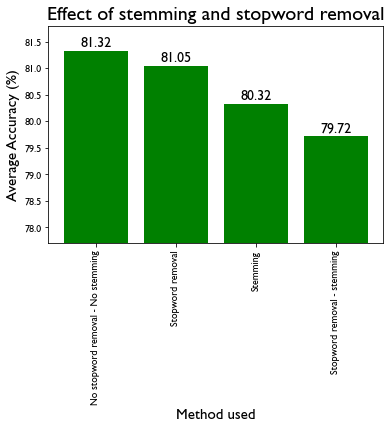

In [71]:
from matplotlib import pyplot as plt

def addlabels(d):
    for key, value in d.items():
        plt.text(key, round(value, 2) * 1.001, round(value, 2),  ha = 'center', **font, size=14)    
        
scores_dict = {'No stopword removal - No stemming': score*100, 'Stopword removal': score_sw*100, 'Stemming': score_st*100, 'Stopword removal - stemming': score_sw_st*100}
font = {'fontname':'Gill Sans MT'}

plt.bar(scores_dict.keys(), scores_dict.values(), color='g')
addlabels(scores_dict)

plt.ylim([77.7,81.8])

plt.xticks(rotation=90, **font)
plt.yticks(**font)

plt.xlabel('Method used', size=15, **font)
plt.ylabel('Average Accuracy (%)', size=15, **font)

plt.title('Effect of stemming and stopword removal', size=20, **font)
plt.show()